In [2]:
import glob
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import matplotlib.pyplot as plt
import os.path

In [3]:
# Conveniently list available tracks to analyze
available_track_files = glob.glob("./tracks/**.npy")
available_track_names = list(map(lambda x: os.path.basename(x).split('.npy')[0], available_track_files))
available_track_names

['reInvent2019_track',
 '2022_august_open',
 'Canada_Training',
 'canada_race',
 'Tokyo_Training_track',
 'Oval_track',
 'New_York_Track',
 'Bowtie_track',
 'H_track',
 'reinvent_base',
 'Mexico_track',
 'Virtual_May19_Train_track',
 'Straight_track',
 'AWS_track',
 'China_track',
 '2022_july_open',
 '2022_june_open',
 'London_Loop_Train']

In [4]:
# Replace the name here with the track to analyze
TRACK_NAME = '2022_august_open'

# Load the center, inner, outer waypoints
waypoints = np.load("./tracks/%s.npy" % TRACK_NAME)

# Separate into center, inner, outer waypoints
center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]

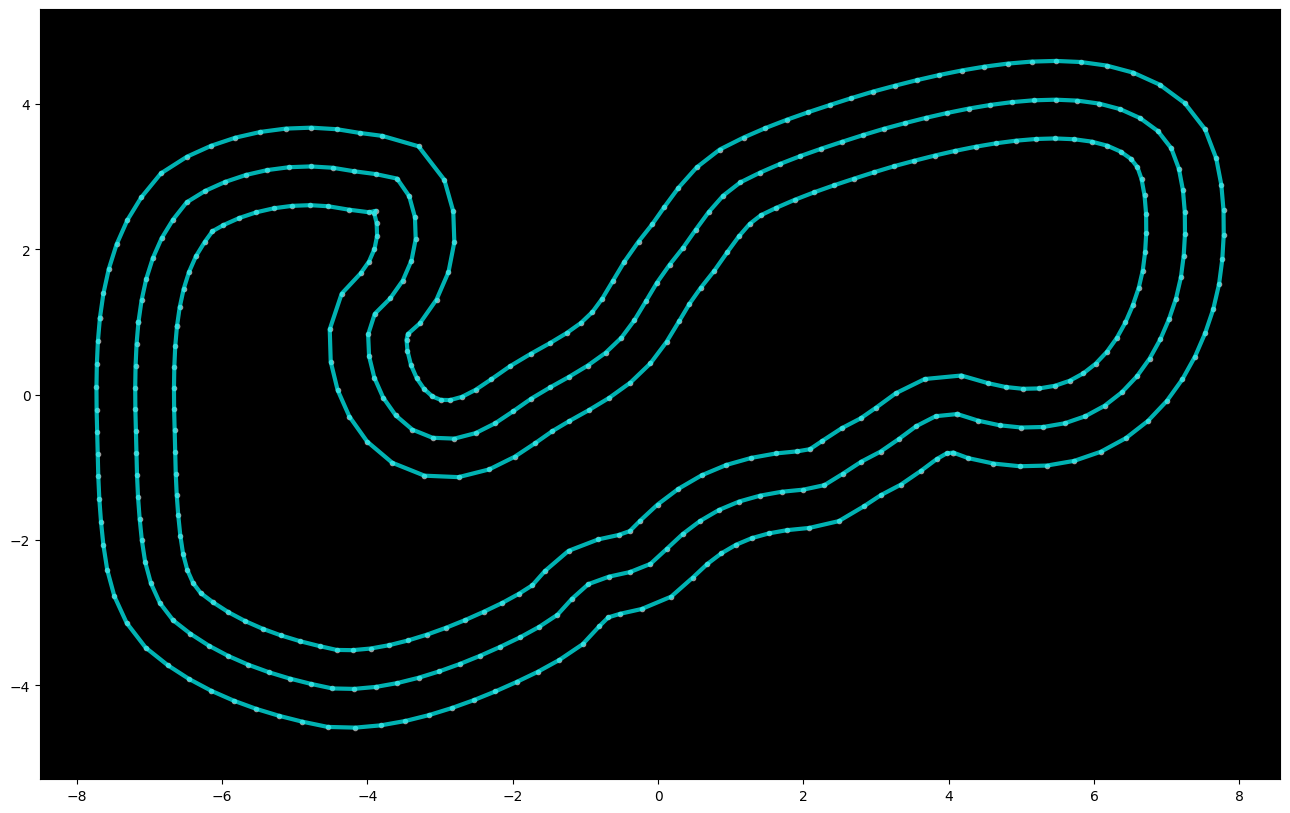

In [5]:
def plot_coords(ax, ob):                                                        
    x, y = ob.xy                                                                
    ax.plot(x, y, '.', color='#999999', zorder=1)                               
                                                                                
def plot_bounds(ax, ob):                                                        
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))                          
    ax.plot(x, y, '.', color='#000000', zorder=1)                               
                                                                                
def plot_line(ax, ob):                                                          
    x, y = ob.xy                                                                
    ax.plot(x, y, color='cyan', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                                                                                
def print_border(ax, waypoints, inner_border_waypoints, outer_border_waypoints):
    line = LineString(waypoints)                                                
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(inner_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(outer_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)     

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, center_line, inner_border, outer_border)

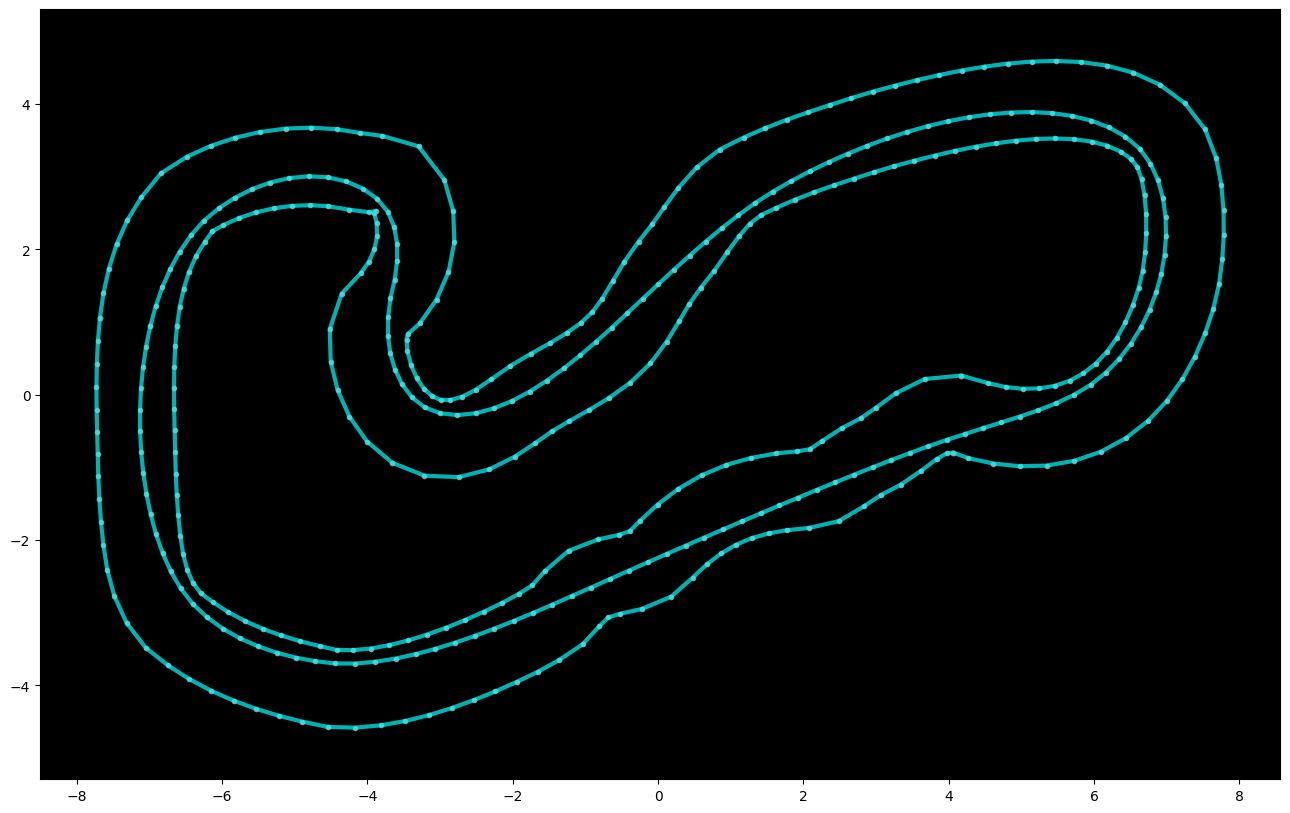

In [6]:
from numpy import array

fname = './racelines/2022_august_open-2000-4-2022-09-14-211800.py'
with open(fname, "r") as file:
    deserialized = eval(file.read())
racing_line = deserialized
fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, racing_line, inner_border, outer_border)

In [7]:
from numpy import array

fname = './speeds/2022_august_open-0-5-2022-09-15-210509.py'
with open(fname, "r") as file:
    deserialized = eval(file.read())
optimal_speeds = deserialized
optimal_speeds

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.94497889, 0.8454445 , 0.77209455,
       0.77209455, 0.77209455, 0.77209455, 0.77209455, 0.86023845,
       0.92801365, 0.99126946, 0.94472519, 0.94472519, 0.94472519,
       0.94472519, 0.94472519, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.98348112, 0.84025128, 0.84025128, 0.84025128,
       0.84025128, 0.84025128, 0.85536005, 0.91188163, 0.94551739,
       0.97423801, 0.95118535, 0.9084982 , 0.83089469, 0.74965715,
       0.67448885, 0.60129364, 0.60129364, 0.60129364, 0.60129

In [8]:
print(len(optimal_speeds))
print(len(racing_line))

145
146


In [9]:
coord_distances = np.diff(racing_line[:-1], prepend=racing_line[np.newaxis, -2], axis=0)
time_to_prev = np.hypot(coord_distances[:, 0], coord_distances[:, 1]) / optimal_speeds
time_to_prev

array([0.28299711, 0.28645822, 0.28935703, 0.29146659, 0.29260387,
       0.29269221, 0.29182034, 0.30710888, 0.34062787, 0.36952177,
       0.36569214, 0.36134521, 0.35702691, 0.35304903, 0.31443187,
       0.29038413, 0.27173227, 0.2855238 , 0.28621507, 0.28709801,
       0.28813432, 0.28931157, 0.274664  , 0.27665591, 0.27828418,
       0.27990973, 0.28153106, 0.28309354, 0.28455105, 0.28583836,
       0.28698592, 0.28797529, 0.28879346, 0.2894338 , 0.28988086,
       0.29016778, 0.28715706, 0.2854716 , 0.28433424, 0.28347634,
       0.2827633 , 0.28213994, 0.28155694, 0.28099844, 0.28043892,
       0.27985844, 0.27920839, 0.27848396, 0.27765855, 0.27669509,
       0.27559754, 0.27419226, 0.27245787, 0.27030878, 0.26764096,
       0.26454007, 0.26842501, 0.31377539, 0.31756958, 0.31846273,
       0.31936618, 0.31949383, 0.31310445, 0.29223306, 0.28058236,
       0.27153287, 0.27759132, 0.29022663, 0.3169268 , 0.35075957,
       0.38902811, 0.43492739, 0.43283638, 0.43019575, 0.42702

In [16]:
all_values = np.concatenate((racing_line[:-1], optimal_speeds[:, np.newaxis], time_to_prev[:, np.newaxis]), axis=1)
print(all_values.shape)
all_values

(145, 4)


array([[-6.98943482e+00,  9.43785328e-01,  1.00000000e+00,
         2.82997109e-01],
       [-7.04721071e+00,  6.63214022e-01,  1.00000000e+00,
         2.86458219e-01],
       [-7.08960062e+00,  3.76978830e-01,  1.00000000e+00,
         2.89357028e-01],
       [-7.11723677e+00,  8.68253908e-02,  1.00000000e+00,
         2.91466593e-01],
       [-7.13047669e+00, -2.05478778e-01,  1.00000000e+00,
         2.92603866e-01],
       [-7.12947581e+00, -4.98169272e-01,  1.00000000e+00,
         2.92692205e-01],
       [-7.11444703e+00, -7.89602360e-01,  1.00000000e+00,
         2.91820337e-01],
       [-7.08563836e+00, -1.07838034e+00,  9.44978890e-01,
         3.07108879e-01],
       [-7.04256079e+00, -1.36312221e+00,  8.45444500e-01,
         3.40627871e-01],
       [-6.98470047e+00, -1.64249929e+00,  7.72094550e-01,
         3.69521773e-01],
       [-6.91125642e+00, -1.91512885e+00,  7.72094550e-01,
         3.65692139e-01],
       [-6.81955943e+00, -2.17862187e+00,  7.72094550e-01,
      

In [17]:
from datetime import datetime

now = datetime.now()
prefix = './racing-line-speed-time/%s-%s' % (TRACK_NAME, now.strftime('%Y-%m-%d-%H%M%S'))
py_fname = prefix + '.py'
npy_fname = prefix + '.npy'
with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(np.array_repr(all_values))
    
print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, all_values)

Writing python code to ./racing-line-speed-time/2022_august_open-2022-09-17-203248.py
Writing numpy binary to ./racing-line-speed-time/2022_august_open-2022-09-17-203248.npy
